[4.25000516 6.86306062 6.39090527 7.20949017 7.61718665 7.76825065
 7.86528964 7.92482706 7.95778836 7.97616581 7.98657397 7.99244838
 7.99575174 7.99760981 7.99865538 7.99924364 7.99957454 7.99976067
 7.99986538 7.99992427 7.9999574  7.99997604 7.99998652 7.99999242
 7.99999574 7.9999976  7.99999865 7.99999924 7.99999957 7.99999976
 7.99999986 7.99999992 7.99999996 7.99999998 7.99999999 7.99999999
 8.         8.         8.         8.         8.         8.
 8.         8.         8.         8.         8.         8.
 8.         8.         8.         8.         8.         8.
 8.         8.         8.         8.         8.         8.        ]


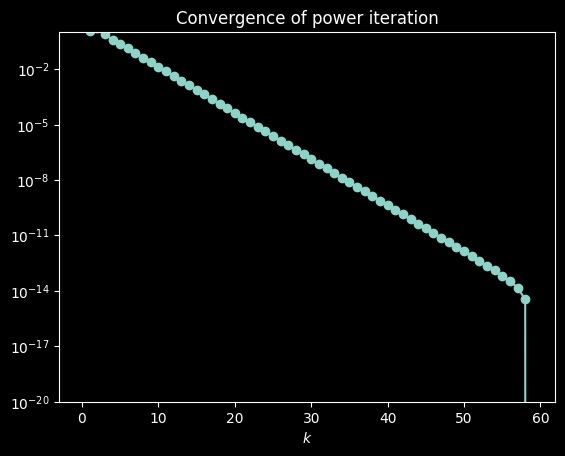

In [13]:
#8.2.1
import numpy as np
import matplotlib.pyplot as plt
def poweriter(A, numiter):
    n = A.shape[0]
    x = np.random.randn(n)
    x = x / np.linalg.norm(x)
    beta = np.zeros(numiter)
    for i in range(numiter):
        y = A @ x
        beta[i] = np.dot(x, y)
        x = y / np.linalg.norm(y)

    return beta, x

A = np.array([
    [8, -14, 0, -14],
    [-8, 1, 1, 1],
    [-4, -2, 0, 2],
    [8, -7, -1, -7]
])

beta, x = poweriter(A, 60)
print(beta)

err = beta[-1] - beta
plt.subplots()
plt.semilogy(np.arange(60), np.abs(err), "-o")
plt.ylim(1e-20, 1), plt.xlabel("$k$")
plt.title("Convergence of power iteration");

In [14]:
#8.2.2
import numpy as np
import matplotlib.pyplot as plt
def poweriter(A, numiter):
    n = A.shape[0]
    x = np.array([0.4, 0.7])
    x = x / np.linalg.norm(x)
    beta = np.zeros(numiter)
    for i in range(numiter):
        y = A @ x
        beta[i] = np.dot(x, y)
        x = y / np.linalg.norm(y)

    return beta, x

A = np.array([
    [0, 1],
    [1, 0]
])

beta, x = poweriter(A, 60)
print(beta)

[0.86153846 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846
 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846
 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846
 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846
 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846
 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846
 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846
 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846
 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846
 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846 0.86153846]


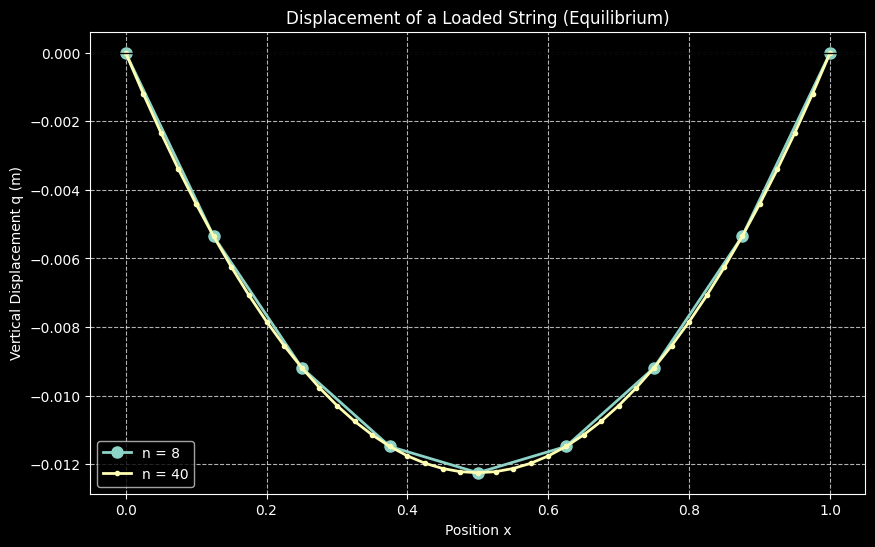

In [15]:
#pre8.3.3 (1)
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

def solve_string_displacement(n):
    # --- 1. 定义物理常数 ---
    tau = 10.0         # 张力 (N)
    g = -9.8           # 重力加速度 (m/s^2), 注意是负的，表示向下

    # 质量分布 m_k = 1 / (10n)
    # 这是一个常数，因为题目说 "for every k"
    m_k = 1.0 / (10.0 * n)

    # --- 2. 构造矩阵 A ---
    # 大小为 (n-1) x (n-1)
    # 系数 C = n * tau
    C = n * tau

    # 主对角线元素为 2C，长度为 n-1
    main_diag = 2 * C * np.ones(n - 1)

    # 偏对角线元素为 -C，长度为 n-2
    off_diag = -C * np.ones(n - 2)

    # 使用 sp.diags 构造三对角稀疏矩阵
    # offsets: 0 是主对角线, -1 是下, 1 是上
    A = sp.diags([off_diag, main_diag, off_diag], [-1, 0, 1], format="csr")

    # --- 3. 构造右端项向量 f ---
    # f = m_k * g
    f = (m_k * g) * np.ones(n - 1)

    # --- 4. 求解线性方程组 (相当于 MATLAB 的 backslash) ---
    # q_inner 是中间的 n-1 个位移
    q_inner = spsolve(A, f)

    # --- 5. 添加边界条件 ---
    # 题目要求包含 x=0 和 x=1 处的零值
    # np.r_ 是一个连接数组的快捷方式: [0, q_inner..., 0]
    q_full = np.r_[0, q_inner, 0]

    # 生成 x 坐标轴: 0 到 1，共 n+1 个点
    x = np.linspace(0, 1, n + 1)

    return x, q_full

# --- 主程序：分别计算 n=8 和 n=40 并画图 ---
plt.figure(figsize=(10, 6))

# 情况 1: n = 8
x8, q8 = solve_string_displacement(8)
plt.plot(x8, q8, 'o-', label='n = 8', linewidth=2, markersize=8)

# 情况 2: n = 40
x40, q40 = solve_string_displacement(40)
plt.plot(x40, q40, '.-', label='n = 40', linewidth=2)

# --- 图表美化 ---
plt.title("Displacement of a Loaded String (Equilibrium)")
plt.xlabel("Position x")
plt.ylabel("Vertical Displacement q (m)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
# 反转 y 轴，或者直接看负值。因为重力向下，位移应该是负的。
# 这样画出来形状像垂下来的绳子
plt.axhline(0, color='black', linewidth=1)

plt.show()

<>:69: SyntaxWarning: invalid escape sequence '\l'
<>:69: SyntaxWarning: invalid escape sequence '\l'
C:\Users\entropy\AppData\Local\Temp\ipykernel_54308\820164970.py:69: SyntaxWarning: invalid escape sequence '\l'
  label=f'Mode {i+1} ($\lambda \\approx {evals[i]:.1f}$)')


------------------------------
n = 40 时，绝对值最小的三个特征值：
------------------------------
Mode 1: λ = 2.4661
Mode 2: λ = 9.8493
Mode 3: λ = 22.1041
------------------------------


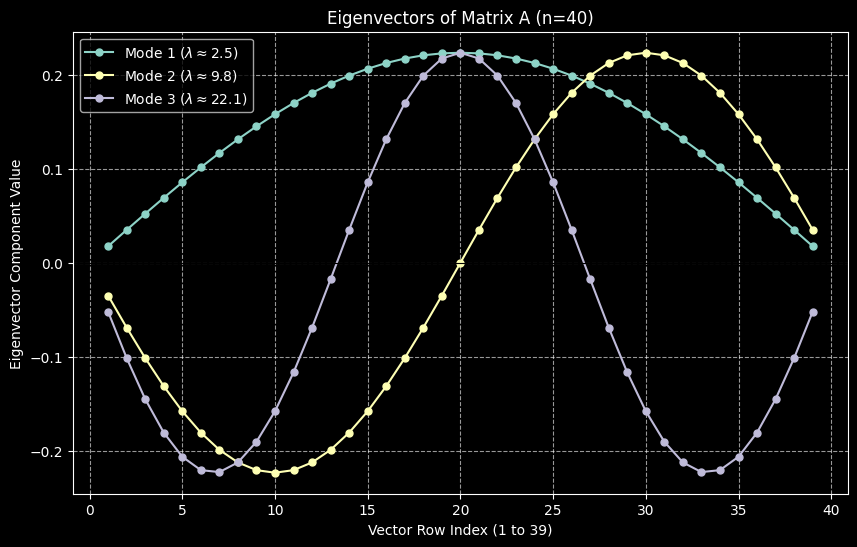

In [17]:
#pre8.3.3 (2)
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

def solve_string_modes():
    # ==========================================
    # 1. 定义物理与网格参数
    # ==========================================
    n = 40              # 网格段数
    tau = 10.0          # 张力

    # 根据题目 (a) 部分的推导:
    # 系数 C = n * tau
    # A 的主对角线是 2C，偏对角线是 -C
    C = n * tau         # C = 400.0

    # 矩阵大小为 (n-1) x (n-1)
    matrix_size = n - 1

    # ==========================================
    # 2. 构造三对角稀疏矩阵 A
    # ==========================================
    main_diag = 2 * C * np.ones(matrix_size)
    off_diag = -C * np.ones(matrix_size - 1)

    # 使用 csr 格式存储，计算更高效
    A = sp.diags(
        [off_diag, main_diag, off_diag],
        [-1, 0, 1],
        format="csr"
    )

    # ==========================================
    # 3. 求解特征值分解
    # ==========================================
    # A 是实对称矩阵，使用 eigsh (Hermitian) 算法
    # k=3: 请求解 3 个特征值
    # which='SM': Smallest Magnitude (绝对值最小)，对应物理上的低频基波
    evals, evecs = eigsh(A, k=3, which='SM')

    # ==========================================
    # 4. 报告特征值 (Report eigenvalues)
    # ==========================================
    print("-" * 30)
    print(f"n = {n} 时，绝对值最小的三个特征值：")
    print("-" * 30)
    for i, val in enumerate(evals):
        print(f"Mode {i+1}: λ = {val:.4f}")
    print("-" * 30)

    # ==========================================
    # 5. 绘图 (Plot eigenvectors)
    # ==========================================
    plt.figure(figsize=(10, 6))

    # 题目要求: "as functions of the vector row index"
    # 向量 q 的索引 k 从 1 到 n-1 (即 1 到 39)
    row_indices = np.arange(1, n)

    # 遍历 3 个特征向量进行绘图
    for i in range(3):
        # evecs[:, i] 取出第 i 列，即第 i 个特征向量
        vec = evecs[:, i]

        # 绘图：横轴是索引，纵轴是特征向量的值
        plt.plot(row_indices, vec, 'o-', linewidth=1.5, markersize=5,
                 label=f'Mode {i+1} ($\lambda \\approx {evals[i]:.1f}$)')

    # 图表标注
    plt.title(f"Eigenvectors of Matrix A (n={n})")
    plt.xlabel("Vector Row Index (1 to 39)")  # 明确符合题目要求的横坐标
    plt.ylabel("Eigenvector Component Value")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    # 加上一条 y=0 的参考线
    plt.axhline(0, color='black', linewidth=0.8)

    plt.show()

if __name__ == "__main__":
    solve_string_modes()

网格尺寸: 100x100
矩阵 A 的形状: (100, 100) (即 10000x10000)
主对角线元素 (应为 4): 4.0
密度为：0.046
非零元素的数量为：64


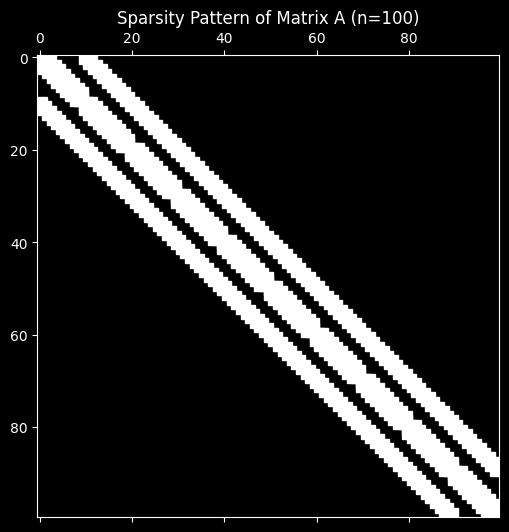

In [9]:
#8.2.3
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

def poisson_2d(n):
    """
    构造二维 n*n 网格的离散拉普拉斯矩阵 A (大小 n^2 * n^2)
    这对应于 FNC.poisson(n)
    """
    # 1. 构造一维的算子 T (三对角矩阵)
    # 大小 n * n
    # 这里的 2 和 -1 是数学上的拓扑关系，物理参数(质量/张力)可以在外部乘上去
    data = [np.ones(n)*2, np.ones(n-1)*-1, np.ones(n-1)*-1]
    offsets = [0, 1, -1]
    T = sp.diags(data, offsets, shape=(n, n), format='csr')

    # 2. 利用 Kronecker Sum 扩展到二维
    # A = T ⊕ T
    # k = 1 (上下左右四个邻居)
    A = sp.kronsum(T, T, format='csr')

    return A

# --- 测试与可视化 ---
n = 10  # 假设每边有 10 个质点
A = poisson_2d(n)
m, n = A.shape

#统计每一行非零元素的个数
row_count = A.getnnz(axis=1)

values, counts = np.unique(row_count, return_counts=True)

# 找到出现次数最多的那个索引
max_index = np.argmax(counts)

most_frequent_num = values[max_index]
count = counts[max_index]

print(f"网格尺寸: {n}x{n}")
print(f"矩阵 A 的形状: {A.shape} (即 {n**2}x{n**2})")
print(f"主对角线元素 (应为 4): {A.diagonal()[0]}")
print(f"密度为：{A.nnz / (m * n)}")
print(f"非零元素的数量为：{count}")
# 可视化矩阵结构
plt.figure(figsize=(6, 6))
plt.spy(A)
plt.title(f"Sparsity Pattern of Matrix A (n={n})")
plt.show()